# Here plotting the results on the test set and comparing the different metrics across the models

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the datasets and their respective files
datasets = ["Total_50", "Total_98", "Nw_50", "Del_50"]
files = ["performance_metrics_total50.pkl", "performance_metrics_total98.pkl", "performance_metrics_nw50.pkl" , "performance_metrics_del50.pkl"]

# Initialize an empty list to collect rows
rows = []

# Load each dataset's metrics and append to rows
for dataset, file in zip(datasets, files):
    with open(file, "rb") as f:
        metrics = pickle.load(f)
    
    # Extract Train and Test metrics
    for split in ["Train", "Test"]:
        row = {
            "Dataset": dataset,
            "Split": split,
            "Recall": metrics[split]["recall"],
            "F1 Score": metrics[split]["f1_score"],
            "Accuracy": metrics[split]["accuracy"]
        }
        rows.append(row)

# Create DataFrame
df_metrics = pd.DataFrame(rows)

In [3]:
df_metrics

,Dataset,Split,Recall,F1 Score,Accuracy
0,Total_50,Train,0.745265,0.777555,0.777788
1,Total_50,Test,0.672951,0.711279,0.711733
2,Total_98,Train,0.170255,0.641174,0.983301
3,Total_98,Test,0.180880,0.648512,0.984027
4,Nw_50,Train,0.745265,0.778811,0.779061
5,Nw_50,Test,0.672684,0.713255,0.713760
6,Del_50,Train,0.738998,0.748634,0.748656
7,Del_50,Test,0.672123,0.684530,0.684587


In [4]:
df_metrics_test = df_metrics[df_metrics['Split'] == 'Test']

# Reset index (optional, for cleaner indexing)
df_metrics_test = df_metrics_test.reset_index(drop=True)

In [5]:
df_metrics_test

,Dataset,Split,Recall,F1 Score,Accuracy
0,Total_50,Test,0.672951,0.711279,0.711733
1,Total_98,Test,0.180880,0.648512,0.984027
2,Nw_50,Test,0.672684,0.713255,0.713760
3,Del_50,Test,0.672123,0.684530,0.684587


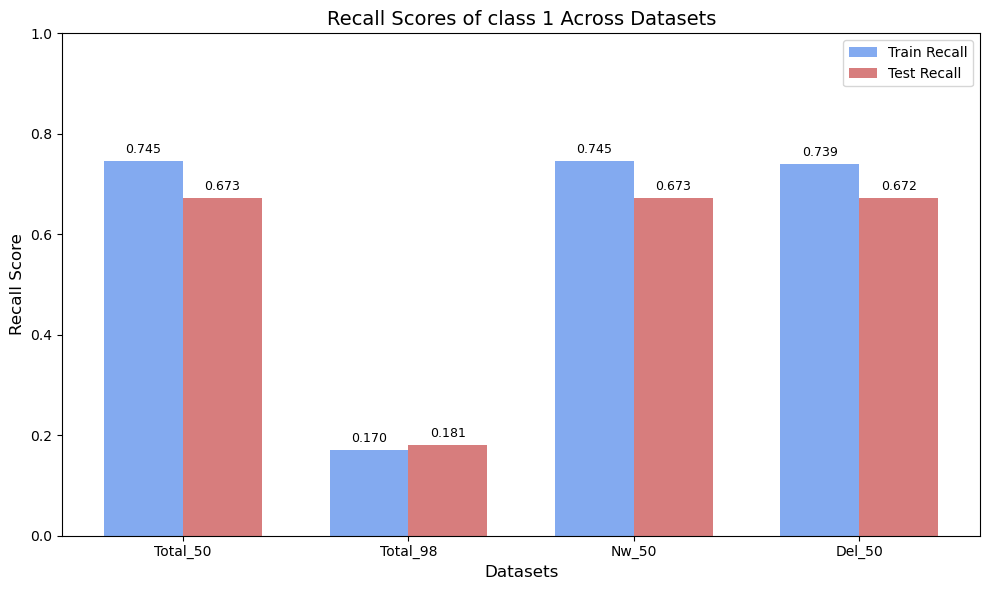

In [58]:
# plotting the recall for all the datasets


datasets = ["Total_50", "Total_98", "Nw_50", "Del_50"]  # Replace with your actual dataset names
train_recall = [df_metrics.iloc[0]['Recall'], df_metrics.iloc[2]['Recall'], df_metrics.iloc[4]['Recall'], df_metrics.iloc[6]['Recall']]
test_recall = [df_metrics.iloc[1]['Recall'], df_metrics.iloc[3]['Recall'], df_metrics.iloc[5]['Recall'], df_metrics.iloc[7]['Recall']]


x = np.arange(len(datasets))  # x-axis positions for datasets
bar_width = 0.35  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Train and test bars
bars_train = ax.bar(x - bar_width / 2, train_recall, bar_width, label='Train Recall', color='cornflowerblue', alpha=0.8)
bars_test = ax.bar(x + bar_width / 2, test_recall, bar_width, label='Test Recall', color='indianred', alpha=0.8)

# Adding labels and title
ax.set_xlabel("Datasets", fontsize=12)
ax.set_ylabel("Recall Score", fontsize=12)
ax.set_title("Recall Scores of class 1 Across Datasets", fontsize=14)
ax.set_ylim(0,1)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=10)
ax.legend(fontsize=10)


# Adding bar value annotations
for bar in bars_train:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars_test:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

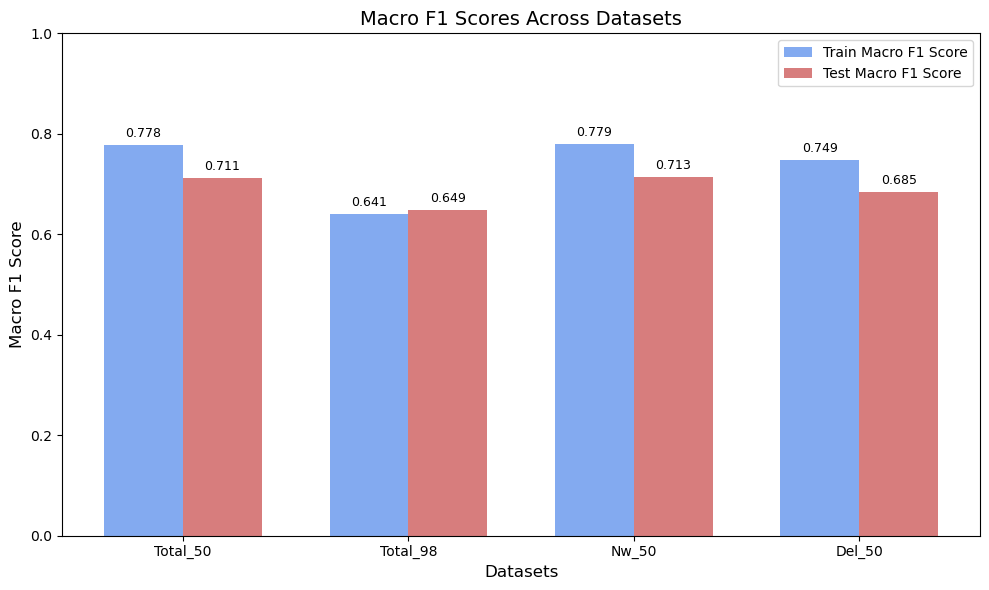

In [59]:
# plotting the recall for all the datasets

datasets = ["Total_50", "Total_98", "Nw_50", "Del_50"]  # Replace with your actual dataset names
train_recall = [df_metrics.iloc[0]['F1 Score'], df_metrics.iloc[2]['F1 Score'], df_metrics.iloc[4]['F1 Score'], df_metrics.iloc[6]['F1 Score']]
test_recall = [df_metrics.iloc[1]['F1 Score'], df_metrics.iloc[3]['F1 Score'], df_metrics.iloc[5]['F1 Score'], df_metrics.iloc[7]['F1 Score']]


x = np.arange(len(datasets))  # x-axis positions for datasets
bar_width = 0.35  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Train and test bars
bars_train = ax.bar(x - bar_width / 2, train_recall, bar_width, label='Train Macro F1 Score', color='cornflowerblue', alpha=0.8)
bars_test = ax.bar(x + bar_width / 2, test_recall, bar_width, label='Test Macro F1 Score', color='indianred', alpha=0.8)

# Adding labels and title
ax.set_xlabel("Datasets", fontsize=12)
ax.set_ylabel("Macro F1 Score", fontsize=12)
ax.set_title("Macro F1 Scores Across Datasets", fontsize=14)
ax.set_ylim(0,1)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=10)
ax.legend(fontsize=10)


# Adding bar value annotations
for bar in bars_train:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars_test:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

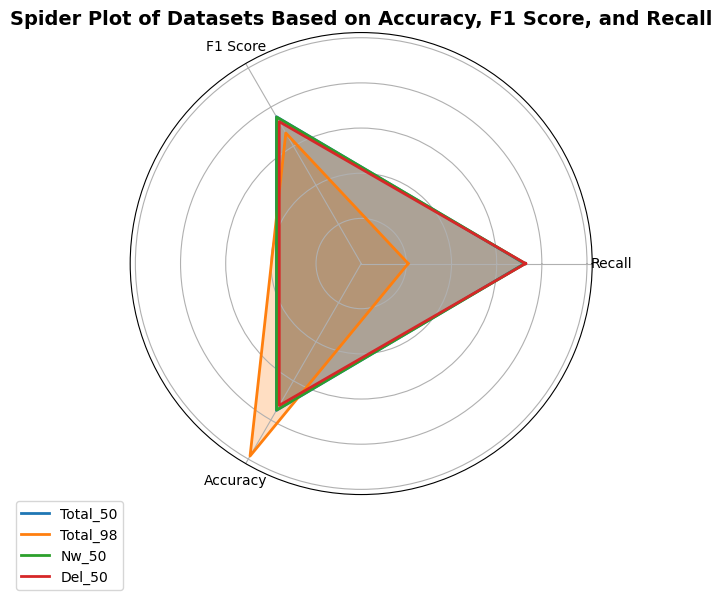

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data
labels = ['Recall', 'F1 Score', 'Accuracy']
datasets = {
    'Total_50': [0.723789, 0.750605, 0.750808],
    'Total_98': [0.208160, 0.667583, 0.984168],
    'Nw_50': [0.725997, 0.748907, 0.749059],
    'Del_50': [0.727894, 0.725592, 0.725592]
}

# Number of variables (features)
num_vars = len(labels)

# Calculate angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by repeating the first point to close the polygon
angles += angles[:1]

# Create a radar chart
fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

# Colors for each dataset
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot each dataset
for idx, (dataset, values) in enumerate(datasets.items()):
    values += values[:1]  # Ensure the loop closes
    ax.fill(angles, values, color=colors[idx], alpha=0.25)  # Fill the area
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=dataset)  # Plot the line

# Add labels
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])  # Place labels at each axis
ax.set_xticklabels(labels)

# Add title and legend
plt.title('Spider Plot of Datasets Based on Accuracy, F1 Score, and Recall', size=14, weight='bold')
plt.legend(loc='best', bbox_to_anchor=(0,0))

# Show plot
plt.show()
